In [44]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [17]:
data = np.loadtxt("hw8_q2.csv",delimiter=",", dtype=float)
X = data[:,0:2]
y = data[:,2]

In [58]:
def linearparameters(X, y, c):
    model = SVC(C=c, kernel='linear', gamma='auto')
    clf = model.fit(X, y)
    w = model.coef_[0]
    b = model.intercept_[0]
    return w, b, clf
w, b, clf = linearparameters(X,y,1)
V = clf.support_vectors_

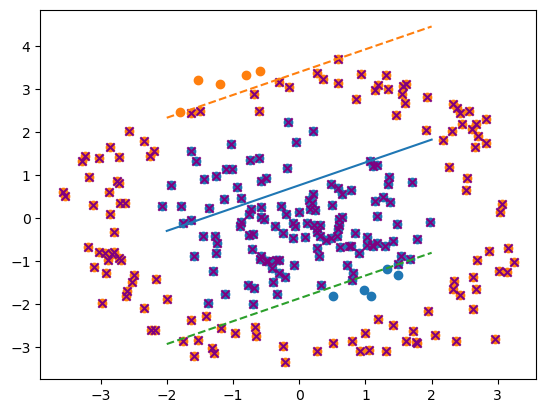

In [65]:
def plot_points():
    plt.scatter(X[:128,0], X[:128,1])
    plt.scatter(X[128:256,0], X[128:256,1])
    
plot_points()

x_val = np.linspace(-2,2,100)
plt.plot(x_val, -b/w[1] - w[0]/w[1] * x_val, '-')
plt.plot(x_val, -b/w[1] - w[0]/w[1] * x_val - 1/w[1], '--') 
plt.plot(x_val, -b/w[1] - w[0]/w[1] * x_val + 1/w[1], '--') 

plt.scatter(V[:,0], V[:,1], marker='x', color='purple')

In [60]:
def gbf(x, mean, s, axis):
    value = np.exp(-(1 / 2 * s**2) * np.sum((x - mean)**2, axis))
    return value

In [117]:
s1, s2, s3, s4 = 0.01,0.1,1,10
Xg = np.column_stack((gbf(X,[0,0],s1,1), gbf(X, [0,0],s2,1), gbf(X, [0,0],s3,1), gbf(X, [0,0], s4, 1)))
#Xg = np.column_stack((gbf(X,[0,0],s,1), gbf(X,[0,0],s,1)))

In [115]:
wg, bg, clfg = linearparameters(Xg, y, 1)

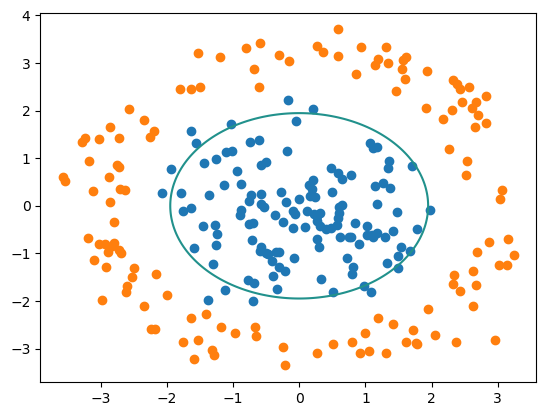

In [118]:
plot_points()

x_val = np.linspace(-2,2,100)
x1,x2 = np.meshgrid(x_val, x_val)
xmesh = np.stack((x1,x2)).T
#Z = bg + 2*wg[0]*gbf(xmesh,[0,0],s,2)
Z = bg + wg[0]*gbf(xmesh,[0,0],s,2) + wg[1]*gbf(xmesh, [0,0],s,2) + wg[2]*gbf(xmesh, [0,0],s,2) + wg[3]*gbf(xmesh, [0,0], s, 2)
plt.contour(x1,x2,Z,0)

In [130]:
SVM_model = SVC(C=1, kernel='rbf', gamma=1)
SVM_clf = SVM_model.fit(X, y)

-2.0